In [46]:
import sys
import timeit
import matplotlib.pyplot as plt

sys.setrecursionlimit(1000000000)

### Função de troco recursiva

In [47]:
def ProbTrocoMin_recursive(value, coins):
    # Implementação recursiva com memoização
    memo = {}
    return ProbTrocoMin_Aux(value, coins, memo)

def ProbTrocoMin_Aux(currentValue, coins, memo):
    if currentValue == 0:
        return 0
    if currentValue in memo:
        return memo[currentValue]
    
    minCoins = float("inf")
    for coin in coins:
        if coin <= currentValue:
            numCoins = ProbTrocoMin_Aux(currentValue - coin, coins, memo)
            if numCoins != float("inf"):
                minCoins = min(minCoins, numCoins + 1)
    
    memo[currentValue] = minCoins
    return minCoins

### Função de troco iterativa

In [48]:
def ProbTrocoMin_iterative(value, coins):
    # Implementação iterativa
    if value < 0:
        return -1
    
    minCoins = [float("inf")] * (value + 1)
    minCoins[0] = 0
    
    for currentValue in range(1, value + 1):
        for coin in coins:
            if coin <= currentValue:
                minCoins[currentValue] = min(minCoins[currentValue], minCoins[currentValue - coin] + 1)
    
    return minCoins[value] if minCoins[value] != float("inf") else -1

### Função comparativa variando o tamanho

In [49]:
def compare_algorithms_varying_n(n_sizes, coins):
    recursive_times = []
    iterative_times = []
    
    for n in n_sizes:
        value = n
        
        # Medição de tempo para a função recursiva com memoização
        recursive_time = timeit.timeit(lambda: ProbTrocoMin_recursive(value, coins), number=1)
        recursive_times.append(recursive_time)
        
        # Medição de tempo para a função iterativa
        iterative_time = timeit.timeit(lambda: ProbTrocoMin_iterative(value, coins), number=1)
        iterative_times.append(iterative_time)
        
        # print(f"Tamanho da entrada: {n}")
        # print(f"Tempo (recursivo com memoização): {recursive_time:.6f} segundos")
        # print(f"Tempo (iterativo): {iterative_time:.6f} segundos")
        # print()

    return recursive_times, iterative_times

### Função comparativa variando o conjunto de moedas

In [50]:
def compare_algorithms_varying_coins(n, max_coins=10):
    recursive_times = []
    iterative_times = []
    coin_sets = [list(range(1, i + 1)) for i in range(1, max_coins + 1)]
    
    for coins in coin_sets:
        # Medição de tempo para a função recursiva com memoização
        recursive_time = timeit.timeit(lambda: ProbTrocoMin_recursive(n, coins), number=1)
        recursive_times.append(recursive_time)
        
        # Medição de tempo para a função iterativa
        iterative_time = timeit.timeit(lambda: ProbTrocoMin_iterative(n, coins), number=1)
        iterative_times.append(iterative_time)
        
        # print(f"Conjunto de moedas: {coins}")
        # print(f"Tempo (recursivo com memoização): {recursive_time:.6f} segundos")
        # print(f"Tempo (iterativo): {iterative_time:.6f} segundos")
        # print()
        
    return recursive_times, iterative_times
    

### Teste com o tamanho variando

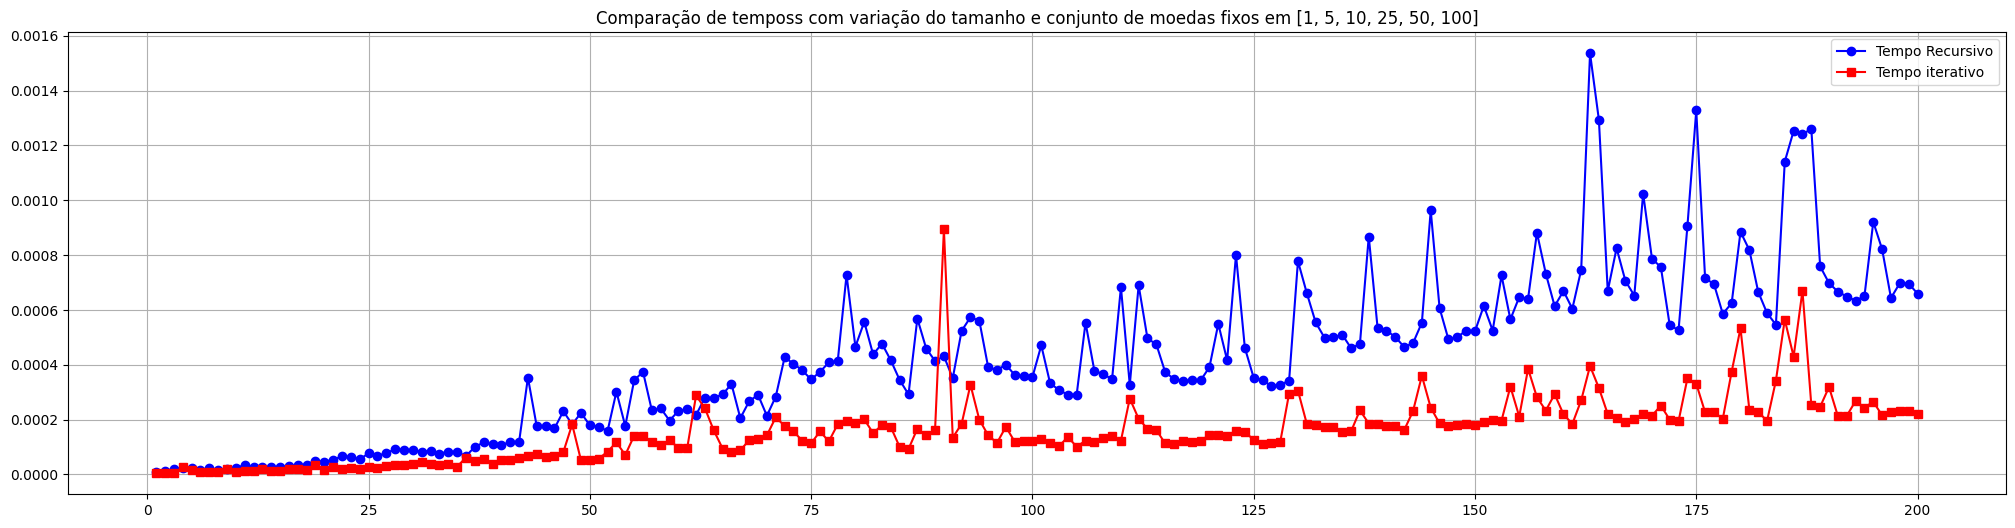

In [53]:
n_sizes = list(range(1, 201))
coins = [1, 5, 10, 25, 50, 100]
rec_n, iter_n = compare_algorithms_varying_n(n_sizes = n_sizes, coins = coins)

plt.figure(figsize=(25, 6))
plt.plot(n_sizes, rec_n, label='Tempo Recursivo', color='blue', marker='o')
plt.plot(n_sizes, iter_n, label='Tempo iterativo', color='red', marker='s')
plt.title(f'Comparação de tempos com variação do tamanho e conjunto de moedas fixos em {coins}')
plt.grid(True)
plt.legend()
plt.show()


### Teste com o conjunto de moedas variando

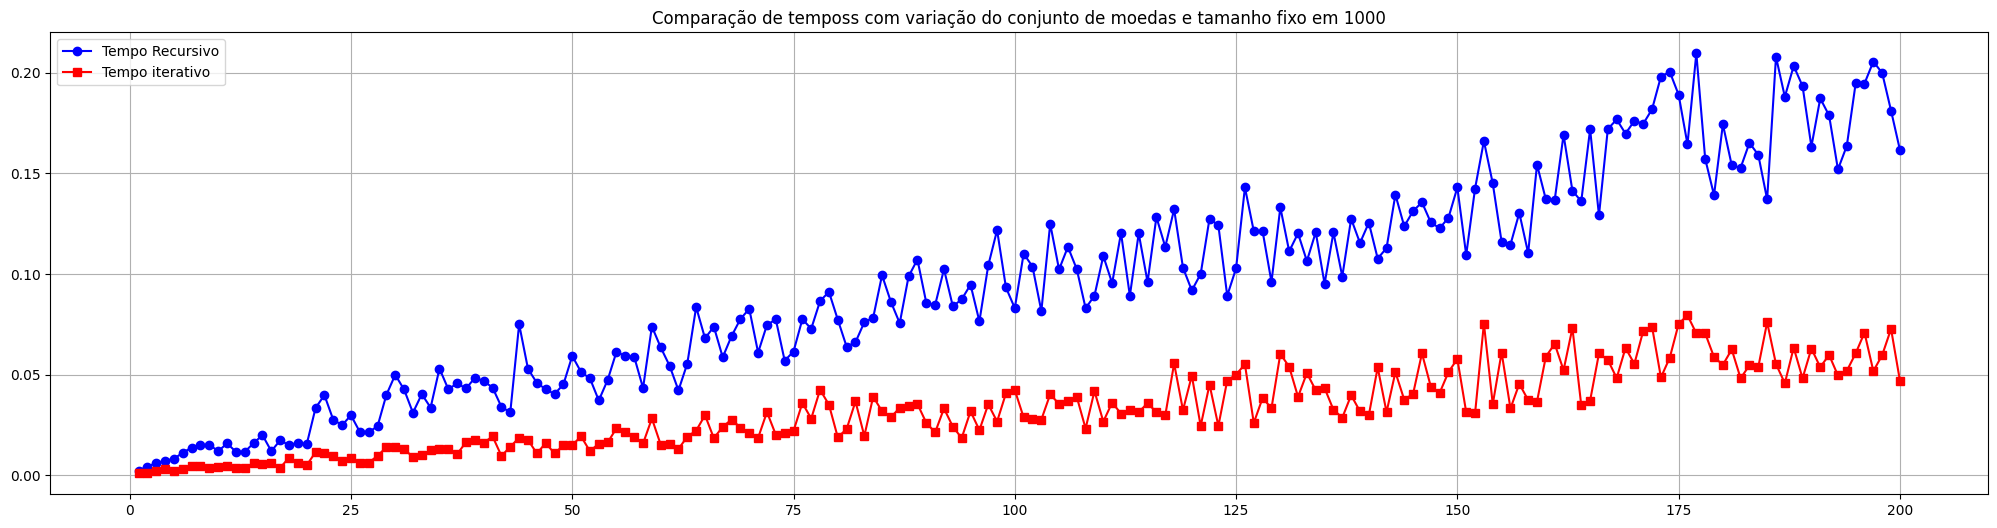

'\nx = n\ny = tempo\n'

In [52]:
n = 1000
max_coins = 200
rec_coin, iter_coin = compare_algorithms_varying_coins(n = n, max_coins = max_coins)

plt.figure(figsize=(25, 6))
plt.plot(range(1, max_coins + 1), rec_coin, label='Tempo Recursivo', color='blue', marker='o')
plt.plot(range(1, max_coins + 1), iter_coin, label='Tempo iterativo', color='red', marker='s')
plt.title(f'Comparação de tempos com variação do conjunto de moedas e tamanho fixo em {n}')
plt.grid(True)
plt.legend()
plt.show()

'''
x = n
y = tempo
'''